In [253]:
# Import Dependencies

import os
import pandas as pd
import numpy as np
# from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [254]:
# Get unemployment data
unemployment_df = pd.read_csv(os.path.join("../../../Data", "WEO_Unemployment.csv"), index_col=["ISO"])
unemployment_df

,WEO Subject Code,Country,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
ISO,,,,,,,,,,,,,,,,,,,
AFG,LUR,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,LUR,Albania,15.751,15.000,14.400,14.100,13.800,13.400,13.100,13.800,14.000,14.000,13.400,15.900,17.5,17.100,15.200,13.700,12.300
DZA,LUR,Algeria,25.664,23.716,17.656,15.265,12.512,13.793,11.343,10.167,9.961,9.971,10.969,9.829,10.6,11.214,10.498,11.709,11.731
AGO,LUR,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATG,LUR,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,LUR,Vietnam,6.010,5.780,5.600,5.310,4.820,4.640,2.380,2.900,2.880,2.220,1.960,2.180,2.1,2.330,2.300,2.240,2.190
WBG,LUR,West Bank and Gaza,31.200,25.500,26.800,23.500,23.700,21.700,26.600,24.500,23.700,20.900,23.000,23.400,26.9,25.900,26.900,25.450,26.250
YEM,LUR,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
# Eliminate unemployment data features we won't need
unemployment_df.drop(["WEO Subject Code", "Country"], axis=1, inplace=True)
unemployment_df

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
ISO,,,,,,,,,,,,,,,,,
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,15.751,15.000,14.400,14.100,13.800,13.400,13.100,13.800,14.000,14.000,13.400,15.900,17.5,17.100,15.200,13.700,12.300
DZA,25.664,23.716,17.656,15.265,12.512,13.793,11.343,10.167,9.961,9.971,10.969,9.829,10.6,11.214,10.498,11.709,11.731
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,6.010,5.780,5.600,5.310,4.820,4.640,2.380,2.900,2.880,2.220,1.960,2.180,2.1,2.330,2.300,2.240,2.190
WBG,31.200,25.500,26.800,23.500,23.700,21.700,26.600,24.500,23.700,20.900,23.000,23.400,26.9,25.900,26.900,25.450,26.250
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
unemployment_df.loc['ALB', '2002']

15.751

In [257]:
# Put average unemployment in to its own DataFrame
avg_ue = unemployment_df.mean(axis=1)
avg_ue

avg_ue_df = pd.DataFrame(avg_ue, index=unemployment_df.index, columns=['avg_ue'])
avg_ue_df

,avg_ue
ISO,
AFG,NaN
ALB,14.497118
DZA,13.329294
AGO,NaN
ATG,NaN
...,...
VNM,3.402353
WBG,25.052941
YEM,NaN


In [258]:
# Get GDP data
gdp_df = pd.read_csv(os.path.join("../../../Data", "WEO_GDP.csv"), index_col=["ISO"])
gdp_df.head()

,WEO Subject Code,Country,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
ISO,,,,,,,,,,,,,,,,,,,
AFG,NGDPDPC,Afghanistan,233.433,233.755,254.259,294.396,320.674,381.502,447.746,511.374,631.49,714.70,784.611,754.402,747.622,711.337,616.234,636.693,582.323
ALB,NGDPDPC,Albania,1425.130,1846.120,2373.580,2673.770,2972.750,3595.050,4370.560,4114.090,4097.83,4439.89,4248.910,4415.600,4584.920,3953.610,4124.410,4542.760,5284.440
DZA,NGDPDPC,Algeria,1806.860,2128.390,2636.310,3141.030,3508.960,3986.560,4943.500,3886.060,4480.72,5453.89,5575.650,5477.060,5466.330,4153.320,3918.940,4079.650,4118.740
AGO,NGDPDPC,Angola,841.420,951.969,1222.040,1862.420,2561.860,3099.090,4081.690,3146.800,3641.44,4716.25,5245.020,5436.520,5625.740,4354.920,3676.830,4303.690,3620.590
ATG,NGDPDPC,Antigua and Barbuda,10482.010,10892.400,11581.320,12736.240,14262.100,15992.740,16510.080,14612.900,13564.68,13295.36,13811.080,13392.220,13951.990,14696.890,15556.010,15655.230,16860.960


In [259]:
# Eliminate GDP features we won't need
gdp_df.drop(["WEO Subject Code", "Country"], axis=1, inplace=True)
gdp_df

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
ISO,,,,,,,,,,,,,,,,,
AFG,233.433,233.755,254.259,294.396,320.674,381.502,447.746,511.374,631.490,714.70,784.611,754.402,747.622,711.337,616.234,636.693,582.323
ALB,1425.130,1846.120,2373.580,2673.770,2972.750,3595.050,4370.560,4114.090,4097.830,4439.89,4248.910,4415.600,4584.920,3953.610,4124.410,4542.760,5284.440
DZA,1806.860,2128.390,2636.310,3141.030,3508.960,3986.560,4943.500,3886.060,4480.720,5453.89,5575.650,5477.060,5466.330,4153.320,3918.940,4079.650,4118.740
AGO,841.420,951.969,1222.040,1862.420,2561.860,3099.090,4081.690,3146.800,3641.440,4716.25,5245.020,5436.520,5625.740,4354.920,3676.830,4303.690,3620.590
ATG,10482.010,10892.400,11581.320,12736.240,14262.100,15992.740,16510.080,14612.900,13564.680,13295.36,13811.080,13392.220,13951.990,14696.890,15556.010,15655.230,16860.960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,546.555,610.357,756.981,873.136,996.255,1152.300,1446.770,1481.810,1628.520,1950.46,2197.610,2370.090,2566.910,2582.390,2720.190,2957.930,3211.460
WBG,1102.500,1197.160,1350.910,1461.090,1480.700,1563.700,1913.320,2061.560,2406.260,2711.92,2888.600,3122.990,3158.600,3084.130,3325.850,3407.310,3353.230
YEM,560.031,597.771,682.148,797.704,881.648,971.326,1171.170,1060.930,1266.790,1302.30,1367.720,1515.950,1574.250,1500.690,1061.840,891.888,762.136


In [260]:
# transpose_ue_df = unemployment_df.T
# transpose_ue_df.reset_index()
# transpose_ue_df.set_index(unemployment_df.columns)
# transpose_ue_df

In [261]:
trafficking_df = pd.read_csv(os.path.join("../../../Exports", "eda5b.csv"))
trafficking_df.head()

,yearOfRegistration,Datasource,gender,citizenship,isForcedLabour,ControlCategory,RecruiterCategory,ExploitType,Labor_Type,ageCategories
0,2012,Case Management,Female,LK,1,Threats,Other,Forced Labor,Domestic Work,Age 30-38
1,2012,Case Management,Female,LK,1,Financial,Other,Forced Labor,Domestic Work,Age 30-38
2,2012,Case Management,Female,LK,1,Threats,Other,Forced Labor,Domestic Work,Age 30-38
3,2012,Case Management,Female,LK,1,Financial,Other,Forced Labor,Domestic Work,Age 30-38
4,2012,Case Management,Female,LK,1,Financial,Other,Forced Labor,Domestic Work,Age 30-38


In [262]:
trafficking_df.shape

(14299, 10)

In [263]:
countries_df = pd.read_csv(os.path.join("../../../Data", "countries.csv"))
countries_df.head()

,country_name,country_iso2,country_iso3,country_un_code
0,Afghanistan,AF,AFG,4
1,Aland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16


In [264]:
trafficking_merge_df1 = trafficking_df.merge(countries_df, how='left', left_on='citizenship', right_on='country_iso2')
trafficking_merge_df1

,yearOfRegistration,Datasource,gender,citizenship,isForcedLabour,ControlCategory,RecruiterCategory,ExploitType,Labor_Type,ageCategories,country_name,country_iso2,country_iso3,country_un_code
0,2012,Case Management,Female,LK,1,Threats,Other,Forced Labor,Domestic Work,Age 30-38,Sri Lanka,LK,LKA,144.0
1,2012,Case Management,Female,LK,1,Financial,Other,Forced Labor,Domestic Work,Age 30-38,Sri Lanka,LK,LKA,144.0
2,2012,Case Management,Female,LK,1,Threats,Other,Forced Labor,Domestic Work,Age 30-38,Sri Lanka,LK,LKA,144.0
3,2012,Case Management,Female,LK,1,Financial,Other,Forced Labor,Domestic Work,Age 30-38,Sri Lanka,LK,LKA,144.0
4,2012,Case Management,Female,LK,1,Financial,Other,Forced Labor,Domestic Work,Age 30-38,Sri Lanka,LK,LKA,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14294,2018,Hotline,Male,US,0,Threats,Family/Relative,Sexual Exploitation,12,Age 9-17,United States of America,US,USA,840.0
14295,2018,Hotline,Male,US,0,Threats,Family/Relative,Sexual Exploitation,12,Age 9-17,United States of America,US,USA,840.0
14296,2018,Hotline,Male,US,0,Threats,Family/Relative,Sexual Exploitation,12,Age 9-17,United States of America,US,USA,840.0
14297,2018,Hotline,Male,US,0,Other,Family/Relative,Sexual Exploitation,12,Age 9-17,United States of America,US,USA,840.0


In [265]:
x = trafficking_merge_df1.groupby(["country_iso3", "yearOfRegistration"]).agg(['count'])
x

Datasource gender citizenship isForcedLabour  \
                                     count  count       count          count   
country_iso3 yearOfRegistration                                                
AFG          2013                        3      3           3              3   
             2014                        1      1           1              1   
BLR          2015                       90     90          90             90   
             2016                      112    112         112            112   
             2017                       30     30          30             30   
CHN          2017                       11     11          11             11   
             2018                       12     12          12             12   
ERI          2014                        1      1           1              1   
HTI          2012                       89     89          89             89   
IDN          2014                        1      1           1              1   
             2015                        6      6           6              6   
             2016                       28     28          28             28   
             2017                       34     34          34             34   
KEN          2017                       29     29          29             29   
KGZ          2014                       71     71          71             71   
             2015                       66     66          66             66   
             2016                       20     20          20             20   
KHM          2015                       20     20          20             20   
             2016                       31     31          31             31   
             2017                       74     74          74             74   
             2018                       14     14          14             14   
KOR          2016                       12     12          12             12   
LKA          2012                       31     31          31             31   
             2013                       42     42          42             42   
MEX          2017                       19     19          19             19   
MMR          2013                       20     20          20             20   
             2014                        3      3           3              3   
             2015                      102    102         102            102   
             2016                       35     35          35             35   
             2018                       26     26          26             26   
NGA          2015                       98     98          98             98   
NPL          2015                       27     27          27             27   
PHL          2015                       25     25          25             25   
             2016                       13     13          13             13   
THA          2016                       53     53          53             53   
UGA          2014                       66     66          66             66   
UKR          2013                      172    172         172            172   
             2014                       69     69          69             69   
             2015                      332    332         332            332   
             2016                      320    320         320            320   
             2017                      123    123         123            123   
USA          2015                      631    631         631            631   
             2016                     1227   1227        1227           1227   
             2017                     1064   1064        1064           1064   
             2018                      668    668         668            668   
UZB          2015                       10     10          10             10   
             2017                       15     15          15             15   

                               

In [266]:
x.drop(["gender", "citizenship", "isForcedLabour", "ControlCategory", "RecruiterCategory", "ExploitType", "Labor_Type", "ageCategories", "country_name", "country_iso2", "country_un_code"], axis=1, inplace=True)
x

Datasource
                                     count
country_iso3 yearOfRegistration           
AFG          2013                        3
             2014                        1
BLR          2015                       90
             2016                      112
             2017                       30
CHN          2017                       11
             2018                       12
ERI          2014                        1
HTI          2012                       89
IDN          2014                        1
             2015                        6
             2016                       28
             2017                       34
KEN          2017                       29
KGZ          2014                       71
             2015                       66
             2016                       20
KHM          2015                       20
             2016                       31
             2017                       74
             2018                       14
KOR          2016                       12
LKA          2012                       31
             2013                       42
MEX          2017                       19
MMR          2013                       20
             2014                        3
             2015                      102
             2016                       35
             2018                       26
NGA          2015                       98
NPL          2015                       27
PHL          2015                       25
             2016                       13
THA          2016                       53
UGA          2014                       66
UKR          2013                      172
             2014                       69
             2015                      332
             2016                      320
             2017                      123
USA          2015                      631
             2016                     1227
             2017                     1064
             2018                      668
UZB          2015                       10
             2017                       15

In [267]:
year_unemployment = []
year_gdp = []
for row in x.iterrows():
    # print(row[0][0])
    y = row[0][0]
    z = str(row[0][1])
    # value = unemployment_df.loc[y, z]
    year_unemployment.append(unemployment_df.loc[y, z])
    year_gdp.append(gdp_df.loc[y, z])
    # print(y, type(y), z, type(z))
    # print(unemployment_df.loc[y, z])
year_unemployment

[nan,
 nan,
 5.821,
 5.92,
 5.684,
 3.9,
 3.8,
 nan,
 nan,
 5.94,
 6.18,
 5.61,
 5.5,
 nan,
 8.046,
 7.554,
 7.211,
 nan,
 nan,
 nan,
 nan,
 3.675,
 4.0,
 4.4,
 3.423,
 nan,
 nan,
 nan,
 nan,
 nan,
 9.0,
 nan,
 6.275,
 5.475,
 1.0,
 nan,
 7.172,
 9.275,
 9.143,
 9.45,
 9.65,
 5.275,
 4.875,
 4.35,
 3.892,
 nan,
 nan]

In [271]:
x['Unemployment'] = year_unemployment
x['GDP'] = year_gdp
x_no_null = x.dropna()
x_no_null.rename(columns={"Datasource": "Cases"})
x_no_null

Datasource Unemployment       GDP
                                     count                       
country_iso3 yearOfRegistration                                  
BLR          2015                       90        5.821   5941.24
             2016                      112        5.920   5022.47
             2017                       30        5.684   5757.29
CHN          2017                       11        3.900   8823.46
             2018                       12        3.800   9919.81
IDN          2014                        1        5.940   3533.61
             2015                        6        6.180   3367.69
             2016                       28        5.610   3605.72
             2017                       34        5.500   3885.47
KGZ          2014                       71        8.046   1292.62
             2015                       66        7.554   1132.84
             2016                       20        7.211   1131.84
KOR          2016                       12        3.675  29274.23
LKA          2012                       31        4.000   3347.89
             2013                       42        4.400   3607.15
MEX          2017                       19        3.423   9342.92
NGA          2015                       98        9.000   2718.59
PHL          2015                       25        6.275   3039.23
             2016                       13        5.475   3107.65
THA          2016                       53        1.000   5995.21
UKR          2013                      172        7.172   3968.80
             2014                       69        9.275   3053.61
             2015                      332        9.143   2124.62
             2016                      320        9.450   2200.00
             2017                      123        9.650   2655.94
USA          2015                      631        5.275  56848.51
             2016                     1227        4.875  58017.23
             2017                     1064        4.350  60105.85
             2018                      668        3.892  63055.98

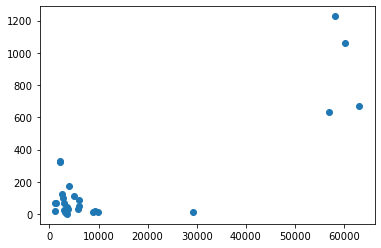

In [270]:
# Try a quick visualization
plt.scatter(x_no_null.GDP, x_no_null.Datasource)
plt.show()

In [ ]:
# Need to scale since we've got figures from the teens up to tens of thousands